**Day 3**: Optimization 🕵️ (***live in 1.51***)

# Helper function
The code below needs to be run first for this class to work.

In [1]:
%matplotlib widget

In [2]:
def update_epoch(epoch):
    gd.update_epoch(epoch)
    gd.fig.canvas.draw_idle()     

<center><h1 style="color:maroon">Machine Learning Optimization</h1>
<img src="https://drive.google.com/uc?id=12grmKE8ZV6LZCM0lkgLnDwtZb0ks8xM3" style="width:1300px;">
    <h3><span style="color: #045F5F">Data Science & Machine Learning for Planet Earth Lecture Series</span></h3><h6><i> by Cédric M. John <span style="size:6pts">(2023)</span></i></h6></center>

## Plan for today's Lecture 🗓 

* Understanding what fitting a model means
* Brief introduction to Gradient Descent and other solvers
* Regression loss Functions
* Logistic function and cross entropy loss

## Intended learning outcomes 👩‍🎓

* Understand weights and biases
* Build an intuition for ML solvers
* Choose an appropriate loss function

# Fitting parametric models
<br>

<center><img src="https://drive.google.com/uc?id=12_Z8xtoi635OZRa9Uu2wHvxg8yMmldKf" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>
<br>Prompt: A 35 mm photo of the internal mechanism of a swiss mechanical clock, dramatic lighting.</center>

### Example of Ordinary Least Square (OLS)
A Linear Regression (OLS) maps a linear relationship between the input $X$ and the output $y$. It optimizes slope $a$ and intercept $b$ by reducing the residuals between the actual $y$ and the prediction $\hat{y}$.
$$\hat{y} = aX+b$$

$$\hat{y} = \color{blue}{\beta_0}+\color{blue}{\beta_1}X$$

In machine learning terminology, <span style="color:blue">$\beta_0$</span> (the intercept) is also known as a <span style="color:teal">**bias**</span> (adds a constant) whereas <span style="color:blue">$\beta_{1}$</span> is referred to as a <span style="color:teal">**weight**</span> (multiplies a feature).

## Today's example: Kaggle Fish Market dataset
Chosen because it is simple: <a href="https://www.kaggle.com/aungpyaeap/fish-market">Kaggle fish market dataset</a>.<br>
<img src="https://drive.google.com/uc?id=12gxXYL8N92aBm6p_aYX74_2ALzSrmglK" style="width:800px;">

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, interact, Button
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Lecture_data/fish.csv')
lc_train = data.copy()
data.head(12)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [4]:
data.shape

(159, 7)

## Width vs Height for 'Breams' and 'Parkkis'

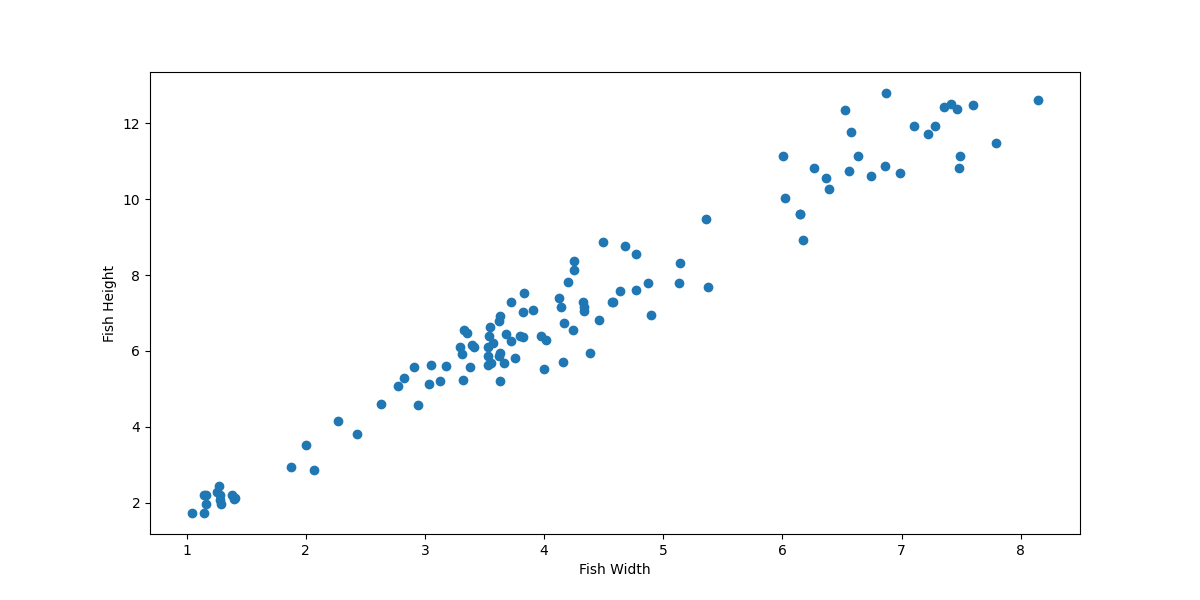

In [5]:
fig, ax = plt.subplots(1,1,figsize=(12, 6))
data=data[(data.Species!='Bream') & (data.Species!='Parkki')]
ax.scatter(data['Width'], data['Height'])
ax.set_ylabel('Fish Height')
ax.set_xlabel('Fish Width');

## 1. Fitting an Sklearn <code>LinearModel()</code>

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

X = MinMaxScaler().fit_transform(data[['Width']])
y = data['Height']

model = LinearRegression().fit(X, y)

In [7]:
pd.DataFrame(X)

,0
0,0.172023
1,0.250070
2,0.261728
3,0.299814
4,0.356140
...,...
108,0.048771
109,0.031208
110,0.029347
111,0.143719


## 2. Plotting data and $\hat{y}$

(0.0, 1.0)

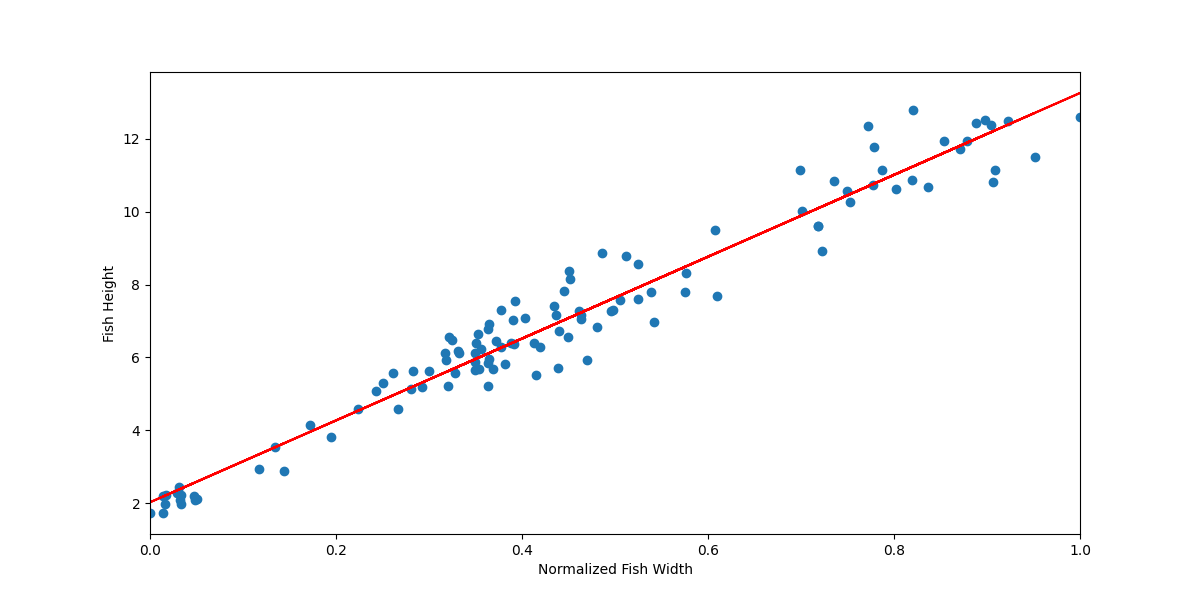

In [8]:
fig, ax = plt.subplots(1,1,figsize=(12, 6))
ax.scatter(X, y)
ax.plot(X, model.predict(X), c='r')
ax.set_ylabel('Fish Height')
ax.set_xlabel('Normalized Fish Width')
ax.set_xlim(0,1)


### Formulation
Given a model expressed as $\hat{y} = h(X, \color{blue}{\beta}) + error$<br> where:
* $h(X,\color{blue}{\beta}) = \color{blue}{\beta_0} + \color{blue}{\beta_1} X_1$ in our example
* $h$ is the **hypothesis** function
* $h(X,\color{blue}{\beta})$ is the **prediction** ($\hat{y})$


Sklearn <code>.fit()</code> finds the best parameters to reduce the $error(X,y,\color{blue}{\beta})$<br>


In [9]:
model_intercept = model.intercept_ # Beta0
model_intercept 

2.022641816611138

In [10]:
model_slope = model.coef_[0] # Beta1
model_slope

11.233517631105808


**The Loss Function L**<br>
In other words, <code>.fit()</code> minimizes the error on what is known as the loss function (<code>L(error)</code>).<br>



This can also be written as:<br> 
$$\color{blue}{\beta} = \text{arg}\min\limits_{\color{blue}{\beta}}\ L(\color{blue}{\beta}, X, y, h)$$<br>



For ordinary least square regression $L$ is the squared error:<br>
$$L_{OLS} = \|error \|^2 = \|y -  \color{blue}{\color{blue}{\beta}_0} - \color{blue}{\color{blue}{\beta}_1} X_1\|^2$$<br>


### Loss/Cost Functions $L$ vs performance metric


* A performance metric measures how well a model performs <span style="color:red">***after fitting***</span>

* A <span style="color:teal">**Loss function $L$**</span> is used to <span style="color:blue">**fit** the model</span>

* Both measure an error response

* Sometime, <span style="color:blue">loss and performance metrics may be the same</span> (e.g. MSE)

* But loss needs to be <span style="color:teal">**(sub)differentiable** (ie. smooth)</span>

# Machine Learning Solvers
<br>

<center><img src="https://drive.google.com/uc?id=12K11w46YaT3FdIM3U5QaCWWmGuDCGK_z" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>
<br>Prompt: Photo of a dusty toolshed with metal tools hanging on a wall, washed out light.</center>

# Why we use solvers
<img src="https://drive.google.com/uc?id=12fYUO35rKUDquPWhyf49hATeVKu7H4cD" style="width:900px"/>
<a href="https://link.springer.com/chapter/10.1007/978-3-319-23036-8_25">Menon & Namitha, 2015</a>

* Direct solution is <span style="color:red">**not always possible:**</span> matrix inversion requires full rank matrices (same amount of columns than rows)

* **For large matrices**, matrix inversion is **<span style="color:red">very computationally inefficient</span>** (see above)

* <span style="color:blue">**SOLUTION:**</span> Approximate the solution through optimization (finding the minimum of a function)

# Intuition behind Gradient Descent Algorithm

* Uses **the slope (gradient) of the Loss Function** as an indicator<br>
* As the slope approaches zero, the Loss approaches its minimum<br>
* Illustrated here for one of the two parameters of OLS (the intercept or the slope)<br>

<img src="https://drive.google.com/uc?id=12tD5pHdrv-LmbK6SseeuZqW83jUwI8SV" style="width:900px;">

<a href="https://towardsdatascience.com/quick-guide-to-gradient-descent-and-its-variants-97a7afb33add">Kansal, 2020</a>


## 1-D gradient descent (finding the intercept $\beta_{0}$)
* Randomly initialize parameter value $\beta_0^{(0)}$

* Compute the derivative of the <span style="color:blue">loss function</span> ($\frac{\partial L}{\partial \color{blue}{\beta_0}}$) at point $\beta_{0}$

* Update the $\beta_{0}$ proportionally to $\frac{\partial L}{\partial \color{blue}{\beta_0}}$ and to a given step size known as the <span style="color:teal">***learning rate*** ($\eta$)</span>

* $\color{blue}{\beta_0}^{\color {red}{(k+1)}} = \color{blue}{\beta_0}^{\color {red}{(k)}} - {\eta} \frac{\partial L}{\partial \color{blue}{\beta_0}}(\color{blue}{\beta_0}^{\color{red}{(k)}})$

* One update cycle where all of the training data is seen is known as an <span style="color:teal">**epoch**</span>.

* Repeat as many **epochs** as necessary for our algorithm to converge to our stopping criterion

## Loss Function for our regression (Fish Market Dataset)
$$MSELoss = \frac{1}{n}\sum_{i=1}^{n}(y_{i}-\beta_{0}-\beta_{1}*X_{i})^{2}$$

$$\frac{\partial\ MSELoss}{\partial\ \beta_{0}} =  \frac{1}{n}\sum_{i=1}^{n}-2*(y_{i}-\beta_{0}-\beta_{1}*X_{i})$$

$$\frac{\partial\ MSELoss}{\partial\ \beta_{0}} =  -\frac{2}{n}\sum_{i=1}^{n}(y_{i}-\beta_{1}*X_{i}-\beta_{0})$$

# Gradient Descent $\eta$ =0.7

interactive(children=(IntSlider(value=0, description='epoch', max=1499), Output()), _dom_classes=('widget-inte…

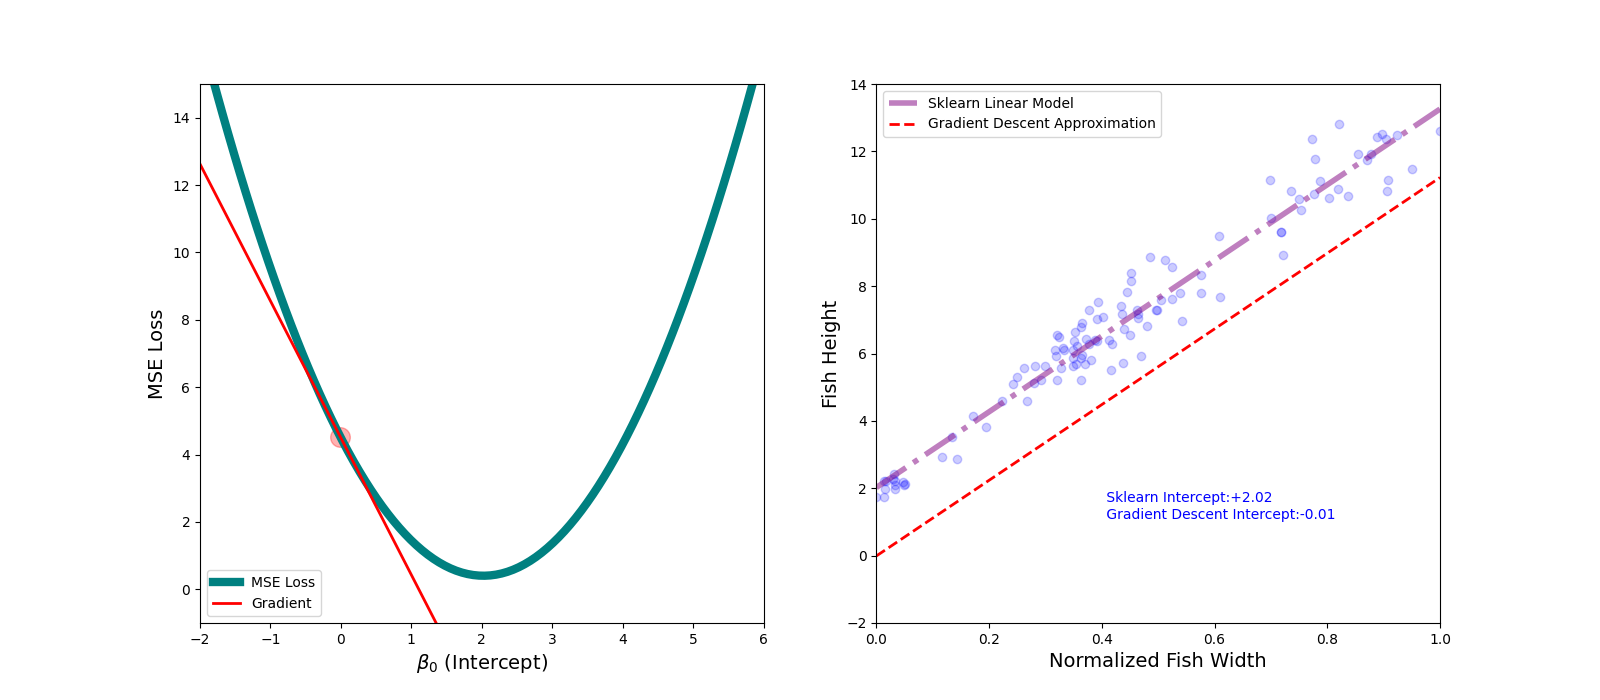

In [11]:
from solvers import GradientDescent
epochs = 1500;eta=.7;initial_beta0=-.01;
gd = GradientDescent(initial_beta0, eta, epochs, model_slope, X, y, model_intercept, model_slope).regression_vs_gradient();
middle_case = [gd.betazeros, gd.losses, gd.gradients]

@interact(epoch=IntSlider(min=0,max=epochs-1,value=0))
def plot(epoch):
    update_epoch(epoch) 

# Stopping Criterions

Gradient Descent can have different **stopping criterions** :<br>

* **Minimum Step Size** (e.g. 0.001). When the step size is smaller, the Gradient Descent has converged, and the corresponding intercept is the optimal value.
* **Maximum number of steps** (e.g. 1000)



# Gradient Descent $\eta$ =0.05

interactive(children=(IntSlider(value=0, description='epoch', max=1499), Output()), _dom_classes=('widget-inte…

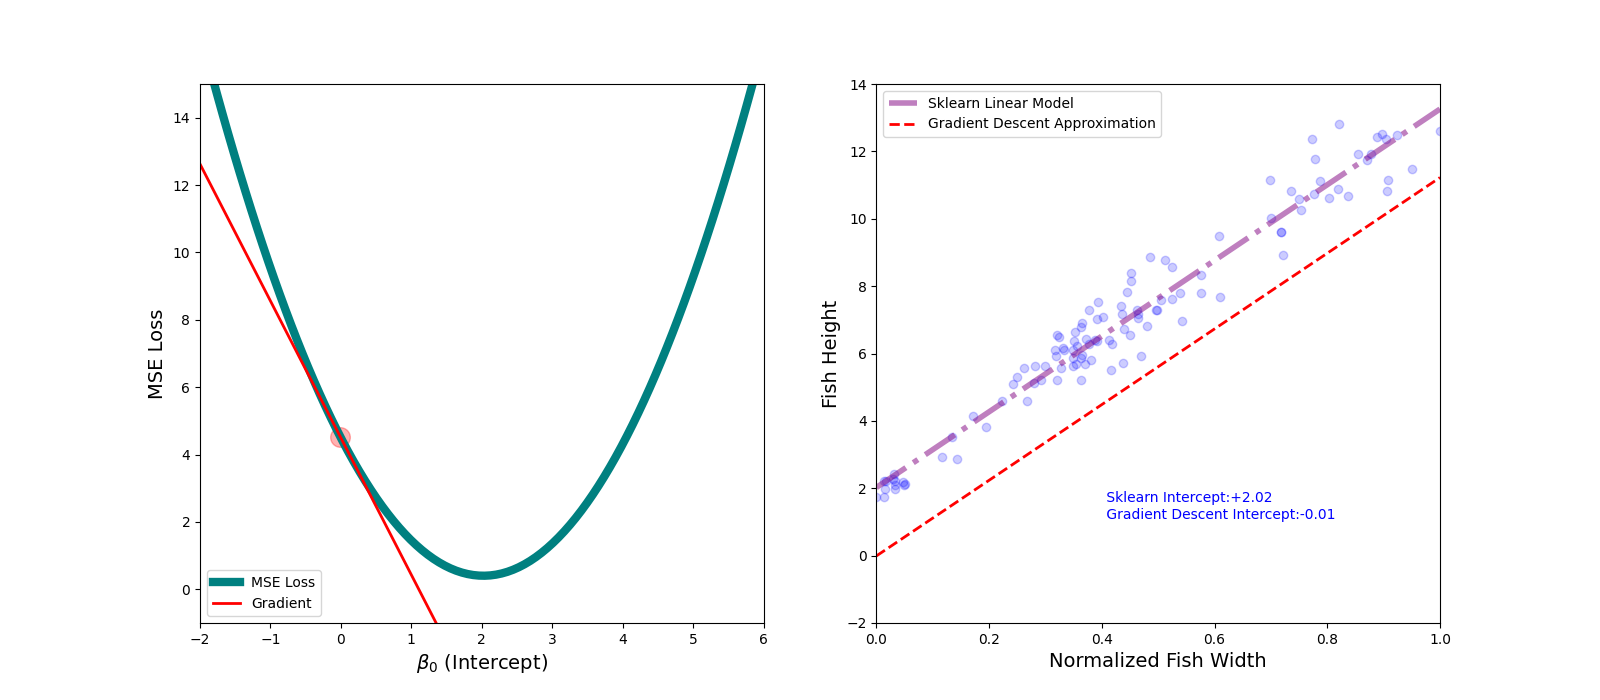

In [24]:
epochs = 1500;eta=.05;initial_beta0=-.01;
gd = GradientDescent(initial_beta0, eta, epochs, model_slope, X, y, model_intercept, model_slope).regression_vs_gradient();
low_case = [gd.betazeros, gd.losses, gd.gradients]

@interact(epoch=IntSlider(min=0,max=epochs-1,value=0))
def plot(epoch):
    update_epoch(epoch)

# Gradient Descent $\eta$ =1.04

interactive(children=(IntSlider(value=0, description='epoch', max=1499), Output()), _dom_classes=('widget-inte…

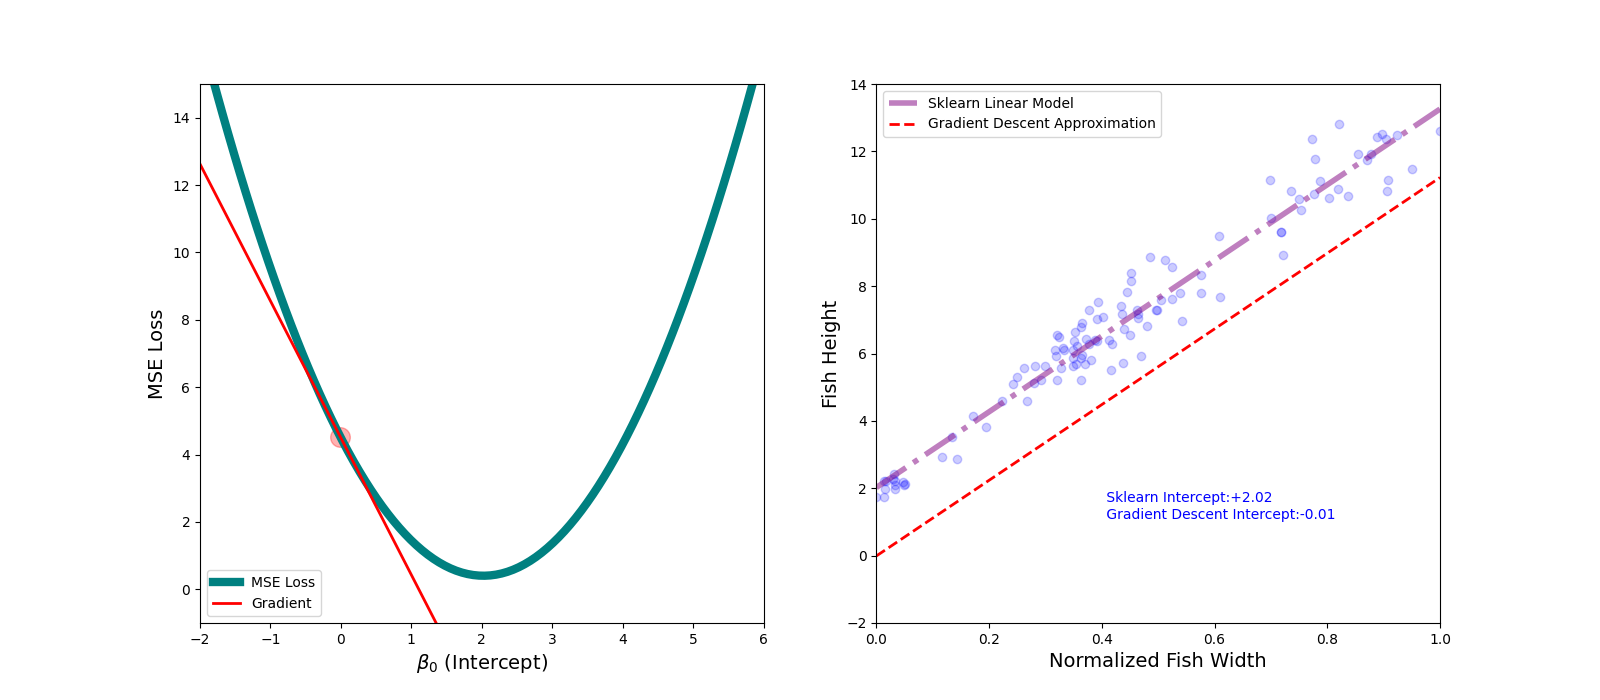

In [25]:
epochs = 1500;eta=1.04;initial_beta0=-.01;
gd = GradientDescent(initial_beta0, eta, epochs, model_slope, X, y, model_intercept, model_slope).regression_vs_gradient();
high_case = [gd.betazeros, gd.losses, gd.gradients]

@interact(epoch=IntSlider(min=0,max=epochs-1,value=0))
def plot(epoch):
    update_epoch(epoch)

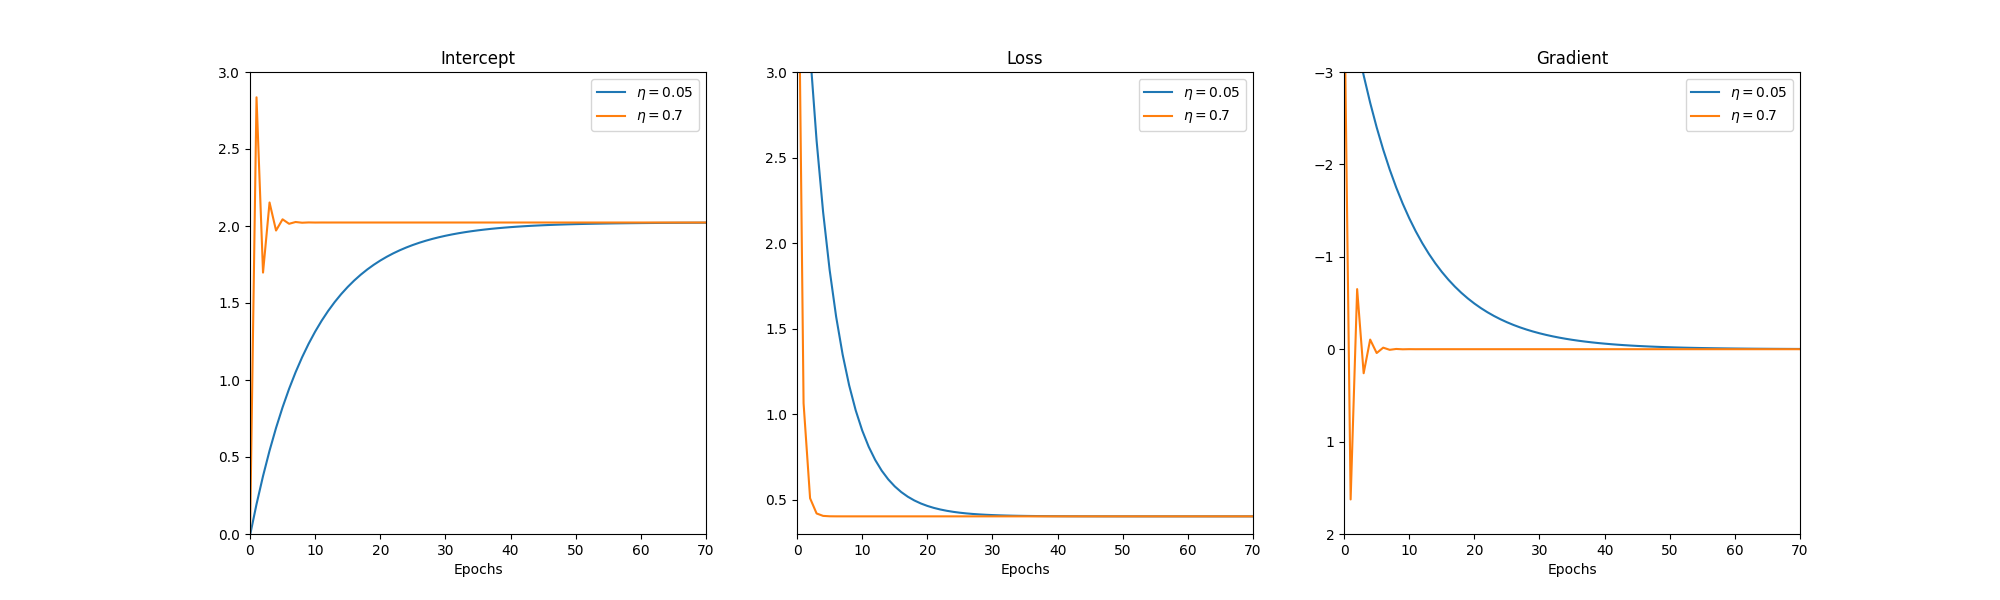

In [26]:
fig, axes = plt.subplots(1,3,figsize=(20,6))
      
for ax, index, title in zip(axes.flatten(),[0,1,2],['Intercept', 'Loss', 'Gradient']):
    ax.set_title(title)
    ax.set_xlabel('Epochs')
    
    for data, label in zip([low_case, middle_case], [r'$\eta=0.05$',r'$\eta=0.7$']):
        ax.plot(range(len(data[0])),data[index], label=label)
        ax.set_xlim(0,70) 
        ax.legend()
        
axes[0].set_ylim(0,3); axes[1].set_ylim(0.3,3); axes[2].set_ylim(2,-3);

## Effect of Learning Rate
**Small learning rate**<br>

* Smoother path to mimimum
* Requires more epochs
* May get stuck at local minima

**Large learning rate**<br>

* Requires less epochs
* More random at first
* May never converge!

💡 **Descent always converges faster when features are scaled**<br>

## 2D descent : How to co-optimize $\color{blue}{\beta_0}$ and $\color{blue}{\beta_1}$?


The Loss function would be 3-dimensional and look something like this.

<img src="https://drive.google.com/uc?id=12OAKwoVPcPRAznuwcGjqmz4n7TLOUvXE" style="width:1200px">
<a href="http://primo.ai/index.php?title=Gradient_Descent_Optimization_%26_Challenges">From Primo.ai</a><br>

* This is called the **Energy Landscape** of the loss function<br>

* Use the **same principle** as above: calculate partial derivative for each term at all steps<br>

* Generalizes to **$n$ parameters** (dimensions)<br>

## Vector formulation of gradient descent for $n$ parameters

Start with random values of $\color{blue}{\beta}$ (epoch 0)<br>

At each **epoch** update all parameters $(\color{blue}{\beta_0}^{\color {red}{(k+1)}}, \color{blue}{\beta_1}^{\color {red}{(k+1)}},..., \color{blue}{\beta_n}^{\color {red}{(k+1)}}$) in the direction of "downard pointing gradient" with a learning rate $\eta$ (eta)<br>


$\color{blue}{\beta}_0^{\color {red}{(k+1)}} = \color{blue}{\beta_0}^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \color{blue}{\beta_0}}(\color{blue}{\beta}^{\color{red}{(k)}})$ <br>
$\color{blue}{\beta_1}^{\color {red}{(k+1)}} = \color{blue}{\beta_1}^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \color{blue}{\beta_1}}(\color{blue}{\beta}^{\color {red}{(k)}})$<br>
$                      [...] $<br>
$\color{blue}{\beta_n}^{\color {red}{(k+1)}} = \color{blue}{\beta_n}^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \color{blue}{\beta_n}}(\color{blue}{\beta}^{\color {red}{(k)}})$




We can consider the vector of partial derivatives, called the **gradient** vector (**nabla**:$\nabla$)$${\displaystyle \nabla L(\color{blue}{\beta})={\begin{bmatrix}{\frac {\partial L}{\partial \color{blue}{\beta_{0}}}}(\color{blue}{\beta})\\\vdots \\{\frac {\partial L}{\partial \color{blue}{\beta_{n}}}}(\color{blue}{\beta})\end{bmatrix}}.}$$💡 hence the name <em>Gradient Descent</em><br>



Gradient descent - vector formula:
$$\color{blue}{\beta}^{\color {red}{(k+1)}} = \color{blue}{\beta}^{\color {red}{(k)}} - \eta \ \nabla L(\color{blue}{\beta}^{\color{red}{(k)}})$$


# Modified versions of Gradient Descent
<br>

<center><img src="https://drive.google.com/uc?id=12k9rbB1afto8PammQDk57E0YSfaxUPgs" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>
<br>Prompt: A futuristic looking formula 1 car is driving very fast down a busy market street.</center>


👎 Gradient Descent is **computationally expensive** on big datasets<br>
At **each epoch** we evaluate $\nabla L$  using all $n$ observations, for each $x$ features. Other approaches exist.<br>



### Classical Stochastic Gradient Descent (SGD)


* Loop one by one over all $n$ observations
* Select a **single, randomly selected data point** 
* Compute the Loss/gradient for this single point
* update all the <span style="color:blue">$\beta$</span>
* Once all $n$ observations have been viewed, repeat another epoch




### Batch or mini-batch Gradient Descent

At each iteration, compute an **"approximate" Loss** based on a batch of data and take one step against its gradient<br>


Choose minibatch size (e.g. 16)<br>

Loop over your $n$ observations, minibatch-per-minibatch<br>

For each minibatch calculate $\nabla L_{mini}$
Use this gradient to update $\beta^{\color {red}{(k+1)}} = \beta^{\color {red}{(k)}} - \eta \ \nabla L_{mini}(\beta^{\color{red}{(k)}})$
Move to next $>X_{mini}$ (e.g. the 16-32 observations)


Once all $n$ observations have been viewed, repeat another **epoch**<br>




By working on a single point rather than the dataset average, the SGD is less stable.<br>

The **Loss fluctuates** from epoch to epoch more and does not necessarily decrease.<br>
As a result, the **steps** taken are **less direct** towards the minimum

<img src="https://drive.google.com/uc?id=12n8lmQgcUNnWrdRfpaYx2cXHGLXWzlF7" style="width:1300px"/>
<img src="https://drive.google.com/uc?id=12kt-SMa2dfAVkZEnC4KKZ7jqEaVH11_w" style="width:1300px"/>
<a href="https://dominicm73.blogspot.com/2020/09/gradient-descent-rule-and-widrow-hoff.html">Source of the plot</a>

<font color="green">Pros</font><br>

SGD is faster for very large datasets
Jumps out of local minima!
Allows to reduce RAM load (see deep learning)


<font color="red">Cons</font><br>

Need more epochs
Never exactly converges (careful when to stop?)
Maybe slower for small $p$


# SGD Algorithms in Scikit-Learn

* For large dataset, it is much faster to use **SGD** in Scikit-Learn
* Two classes: <code>SGDRergessor</code> and <code>SGDClassifier</code>
* The <span style="color:teal">choice of loss function determines the exact algorithm</span>

In [27]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(loss='squared_error', eta0=0.5)

sgd.fit(X, y)

SGDRegressor(eta0=0.5)

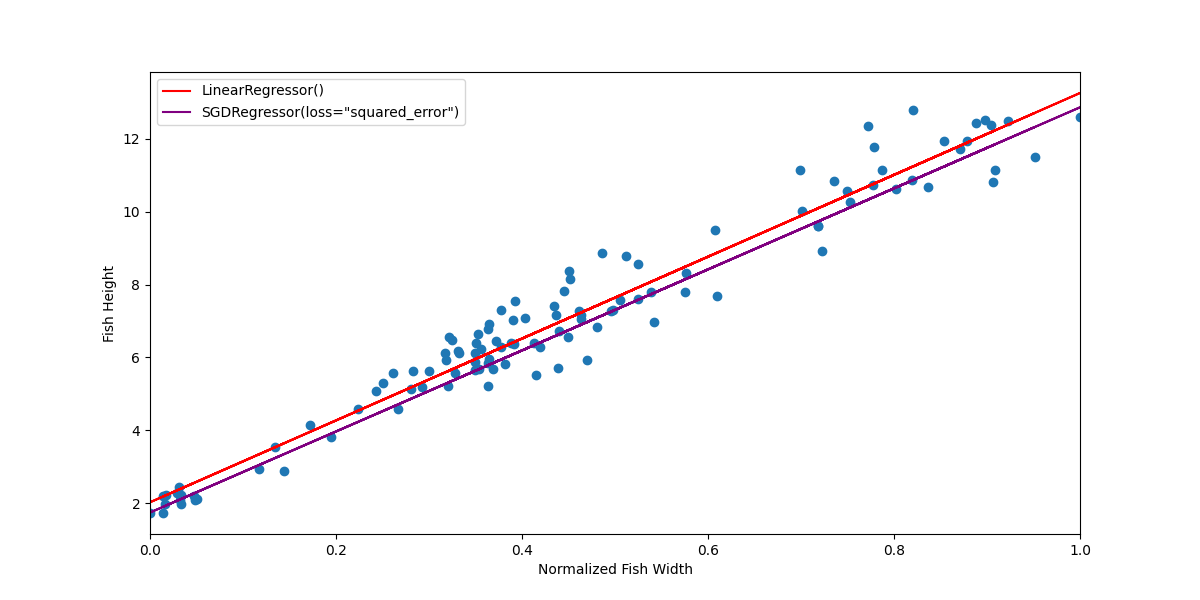

In [28]:
fig, ax = plt.subplots(1,1,figsize=(12, 6))
ax.scatter(X, y)
ax.plot(X, model.predict(X), c='r', label='LinearRegressor()')
ax.plot(X, sgd.predict(X), c='purple', label='SGDRegressor(loss="squared_error")')
ax.set_ylabel('Fish Height')
ax.set_xlabel('Normalized Fish Width')
ax.set_xlim(0,1); ax.legend();

# Second Order Derivative (Hessian) Solvers <span style="color:blue">[in brief]</span>
<br>

<center><img src="https://drive.google.com/uc?id=12ahBFnMZ6GR2BElDMYhC5-CDpFWvVCA2" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>
<br>Prompt: Sunrise on the town of Hesse in Germany by a hazzy autumn day, golden colors, filtered light.</center>

### General Idea:
By incorporating informations from the <span style="color:teal"> **second derivative (Hessian)**</span> of the function, we should be able to:

1. **Converge faster** to the global minima of the function

2. Avoid **local minima**

### Newton's Method
* Newton is the most basic second order solver

* Centered around a quadratic approximation of $f$ for points near $xn$:

$$f(x+\Delta x)≈f(x)+\Delta x^{T}\nabla f(x)+\frac{1}{2}\Delta x^{T}(\nabla^{2}f(x))\Delta x$$
Where $\nabla$ are the gradient and $\nabla^{2}$ the Hessian of the function 

#### Newton's method bottom line:
* will converge to a unique global minimizer for convex function. 
* For non-convex functions will still works but is only guranteed to converge to a local minimum. 
* Calculating the Hessian for large parameter space is impractical (too computationally expansive)



### Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm (L-BFGS)
* L-BFGS is a ***Quasi-Newton*** method

* The idea is to <span style="color:red">**approximate**</span> the Hessian rather than exactly calculate it.

* Much faster to compute than Newton's method

* L-BFGS has been called <span style="color:teal">**"the algorithm of choice"**</span> for fitting log-linear (MaxEnt) models and conditional random fields


# Loss Functions
<br>

<center><img src="https://drive.google.com/uc?id=12Xeqc_tQIJz9UcznfL-E5GFSJu4ovmU-" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>
<br>Prompt: A british tourist lost in the street of Beijing amongst a crowd of busy people, dramatic lighting.</center>

## Regression Loss Functions


### L1 (MAE) vs L2 (MSE) loss

$$ L_1 = MAE = \frac{1}{n}\sum_{i=0}^n | \hat{y}_i - y_i|\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:L_2 = MSE = \frac{1}{n}\sum_{i=0}^n (\hat{y}_i - y_i)^2$$

<img src="https://drive.google.com/uc?id=12MelUt0kKQ50J3S95l5x0Sgg6QyAvjG6" style="width:2000px"/>

* MSE very sensitive to outliers vs. MAE less strict

* MAE requires learning rate $\eta$ which decreases at every epoch

### Huber loss (mixed L1 and L2 losses, also called Smooth Absolute or Smooth L1)
<img src="https://drive.google.com/uc?id=12MRmkH4u6YoUlAT4laxUo9yCbh4O7sL1" style="width:900px"/>
<a href="https://link.springer.com/article/10.1007/s11263-019-01275-0">Image from Feng et al 2020</a>

* Parametrized MAE which becomes MSE when error is small

$L_{\delta} = \left\{
  \begin{array}{lr}
    \frac{1}{2}(y - \hat{y})^{2} & : |y - \hat{y}| \leq \delta\\
    \delta*(|y-\hat{y}|-\frac{1}{2}*\delta) & :  |y - \hat{y}| > \delta
  \end{array}
\right.$

* Adjustable for outliers

* Slope can be used as an indicator of reaching minima

## Classification Losses


### Sarting Point: Logistic classifiers
<img src="https://drive.google.com/uc?id=12g2yRHu6xie9yRtf2_hbBKqVubMaI2qo" style="width:1500px"/><br>
<a href="https://medium.datadriveninvestor.com/logistic-regression-18afd48779ce">Maheshwari, V, 2018</a>

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

### We can apply $\sigma$ to our **hypothesis function**:

$h = \color{blue}{\beta}_0 + \sum_{i=1}^{n}\color{blue}{\beta}_i x_i = \color{blue}{\beta}^{T}x$ (vectorized form of the hypothesis function where $x_0$ is always set to be 1)<br>

The logistic regression assumes that for a single point $x$ the probability of $y=1$ is the logistic function applied to $h$:<br>
$P(Y=1 | X=x) = \sigma (\color{blue}{\beta}^{T}x)$<br>

This is also often written as:<br>
$P(Y=1 | X=x) = \sigma (\color{blue}{\beta}^{T}x)$ <br>
$P(Y=0 | X=x) = 1 - \sigma (\color{blue}{\beta}^{T}x)$ by law of probability<br>

### Likelihood function
In binary classification the outcomes follow a Bernoulli distribution and we can write our pobability function as follows:<br>

$P(Y=y | X=x) = \sigma (\color{blue}{\beta}^{T}x)^{y}[1-\sigma (\color{blue}{\beta}^{T}x)]^{1-y}$<br>

$P(Y=y | X=x) = \left\{
  \begin{array}{lr}
    \sigma (\color{blue}{\beta}^{T}x)\leftarrow y=1\\
    [1-\sigma (\color{blue}{\beta}^{T}x)]\leftarrow y=0
  \end{array}
\right.$

### Log Likelihood
It is easier to work with log of the likelihood function:<br>

$\log{P(Y=y | X=x)} = \log{[\sigma (\color{blue}{\beta}^{T}x)^{y}[1-\sigma (\color{blue}{\beta}^{T}x)]^{1-y}]}=\log{[\sigma(\color{blue}{\beta}^{T}x)]}+(1-y)\log{[1-\sigma(\color{blue}{\beta}^{T}x)]} $<br>

The **log loss** or **binary cross-entropy loss** is simply the negative of the log likelihood so that we can **<i>maximize</i>** it with gradient descent.

$$LL_{CE}(y,\hat{y})= -\log{[\sigma(\color{blue}{\beta}^{T}x)]}+(1-y)\log{[1-\sigma(\color{blue}{\beta}^{T}x)]}$$

The **<i>loss</i>** function is calculated for 1 sample, the **<i>cost</i>** function for all samples is the **average of all losses**:<br>
$$LL_{CE}(\color{blue}{\beta}) = - \frac{1}{n} \sum_{i=1}^{n} y_i\log\sigma(\color{blue}{\beta}^{T}x_i)+(1-y_i)\log[1-\sigma(\color{blue}{\beta}^{T}x_i)]$$

### Cross-Entropy Loss
<img src="https://drive.google.com/uc?id=12g11ACQ2XOaTtMRGkgR3VBjiBoHNhW1t" style="width:2000px"/>
☝️ Infinitely penalize wrong prediction<br/>
💡 Cross-Entropy name comes from <a href="https://www.youtube.com/watch?v=ErfnhcEV1O8">Shanon Theory of information</a><br>



🤔 The gradient of the **log-loss** of the **sigmoid** function is simple in vectorial form<br>
$\nabla LogLoss_{sigmoid} = - \frac{2}{n} \beta^T(y - \hat{y})$<br>




Exact **same formula** than that of the mse-loss of a linear regression<br>
$\nabla MSE_{linear} = - \frac{2}{n} \beta^T(y - \hat{y})$<br>



<br/><br>
⚠️ These gradients **do not have the same value** of course as:<br>
* $\hat{y}_{sigmoid} = \frac{1}{1+e^{-\color{blue}{\beta}^T}}$
* $\hat{y}_{linear} = \color{blue}{\beta}^{T}$


# Regularization


Regularization means adding a **penalty term** to the Loss that **increases** with $\beta$
$$\text{Regularized Loss} = Loss(X,y, \beta) + Penalty(\beta)$$


👉 Penalizes large values for $\beta_i$<br>
👉 Forces model to shrink certain coefficients or even select less features<br>
👉 Prevents overfitting <br>
$$\hat{y} =  \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_1^3 + ... $$


Two famous Regularization penalties:<br><br>
**Lasso** (L1)<br>
$$L1 = Loss  + \alpha \sum_{i=1}^n |\beta_i|$$ <br>
**Ridge** (L2)<br>
$$L2 = Loss + \alpha \sum_{i=1}^n \beta_i^2$$

Introduces the new hyper-parameter $\alpha$:
* Dictates **how much** the model is **regularized**
* Large $\alpha$ force **model complexity and variance to decrease**, but **bias increases**
* Notice $\sum$ starts from $i=1$, i.e. intercept coefficient is not penalized


⚠️   Always **scale** your feature before regularization to penalize each $\beta_i$ fairly

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
def test_reg_coefs(data=lc_train):
    X = data[['Length1','Length2','Length3', 'Height']]

    poly_tr = PolynomialFeatures(degree=2).fit(X)
    X = pd.DataFrame(poly_tr.transform(X))
    X = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

    # The target is the weight of a fish
    Y = data[['Weight']] 

    linreg = LinearRegression().fit(X, Y)
    ridge = Ridge(alpha=1.5, max_iter=5000).fit(X, Y)
    lasso = Lasso(alpha=1.5, max_iter=5000).fit(X, Y)

    coefs = pd.DataFrame({
        "coef_linreg": pd.Series(linreg.coef_[0], index = X.columns),
        "coef_ridge": pd.Series(ridge.coef_[0], index = X.columns),
        "coef_lasso": pd.Series(lasso.coef_, index= X.columns)})\

    return coefs\
        .map(lambda x: int(x))\
        .style.map(lambda x: 'color: red' if x == 0 else 'color: black')

In [30]:
test_reg_coefs()

,coef_linreg,coef_ridge,coef_lasso
0,0,0,0
1,-237,-11,0
2,-47,-11,0
3,13,-147,-166
4,10,-10,0
5,17792,82,0
6,-33149,84,81
7,-2169,12,0
8,303,191,444
9,24409,86,117


# Suggested Resources

## 📺 Videos 
#### Short videos from my Undegraduate Machine Learning Classes:
* 📼 <a href="https://youtu.be/l6mTzbPOWHE?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Gradient Descent</a>

#### Others:

* 📼 <a href="https://www.youtube.com/watch?v=sDv4f4s2SB8">StatsQuest - Gradient Descent</a> by Josh Starmer
* 📼 <a href="https://youtu.be/vMh0zPT0tLI">StatsQuest - Stockastic Gradient Descent Clearly Explained</a> by Josh Starmer

## 📚 Further Reading 
* 📖 <a href="https://andrew.gibiansky.com/blog/machine-learning/hessian-free-optimization/">Hessian Free Optimization</a> by Andrew Gibiansky
* 📖 <a href="https://ruder.io/optimizing-gradient-descent/">An overview of gradient descent optimization algorithms</a> by Sebastien Ruder, 2016

## 💻🐍 Time to Code ! 